### 상관분석

- 연속형 변수 사이의 선형관계에 대해 분석하는 방법
    - 시각화 : 산점도
    - 통계분석 : 상관분석
        - 변수 관계 : 독립 관계(선형관계에서 독립), 양의 상관관계, 음의 상관관계
        - 상관 관계 VS 인과 관계 : 상관관계를 인과관계로 해석하면 안된다.
- 상관계수(Correlation Coefficient) 
    - 변수 사이에 선형 관계 정도를 나타내는 계수
    - 단위가 변하더라도 상관계수 값에는 영향을 주지 않음
    - 특이값에 영향을 받을 수 있기 때문에 상관계수만 고려하기 보다 산점도를 함께 봐야함
    - 값에 대한 해석
        - 0.0 : 상관 관계 없음(선형적인 관계가 없음)
        - ~ 0.5	: 약한 상관 관계
        - ~ 0.7	: 상관 관계 있음
        - ~ 0.9	: 강한 상관 관계
        - 1.0	: 매우 강한 상관 관계

- 상관관계 수식
    - x 와 y 가 함께 변하는 정도 / x 와 y 가 각각 변하는 정도
    - x 와 y 의 공분산 / x와 y의 표준편차의 곱(공분산에 대한 표준화)
        - 공분산 : 두 변수 간의 선형 관계 방향을 나타내는 통계값
            - 양수이면 두 변수가 양의 관계, 음수이면 음의 관계
            - 측정단위에 의해 영향을 받기 때문에 방향은 알 수 있지만 강도는 알 수 없음
<img src='img/corr_formula.png' width=500 align=left>

- 함수
    - df.corr() : 데이터프레임의 모든 변수 간의 상관관계 
    - df.col1.corr(df.col2) : 두 개의 컬럼 간의 상관관계
    - df1.corrwith(df2.col) : 다른 데이터프레임의 컬럼 또는 하나의 변수와 나머지 변수 간의 상관관계
    - np.corrcoef() : 두 개의 컬럼 간의 상관관계

In [36]:
# pandas, numpy 라이브러리 불러오기
import pandas as pd
import numpy as np

In [4]:
# 데이터프레임 생성
data = [[1,2,3,4,5],
        [10,20,30,40,50],
        [0,0,0,0,0],
        [-10,-20,-30,-40,-50]]
df1 = pd.DataFrame(data)
df1 = df1.T

In [7]:
df1.columns = ['A', 'B', 'C','D']
df1

,A,B,C,D
0,1,10,0,-10
1,2,20,0,-20
2,3,30,0,-30
3,4,40,0,-40
4,5,50,0,-50


In [9]:
df1['C'].var()

0.0

In [8]:
# 컬럼 사이의 상관계수 구하기
# 결과해석
df1.corr()

,A,B,C,D
A,1.0,1.0,NaN,-1.0
B,1.0,1.0,NaN,-1.0
C,NaN,NaN,NaN,NaN
D,-1.0,-1.0,NaN,1.0


In [10]:
# 컬럼 c의 값을 모두 3으로 변경
df1['C'] = 3
df1

,A,B,C,D
0,1,10,3,-10
1,2,20,3,-20
2,3,30,3,-30
3,4,40,3,-40
4,5,50,3,-50


In [11]:
# 값이 변경된 컬럼에 대한 상관계수 확인
df1.corr()

,A,B,C,D
A,1.0,1.0,NaN,-1.0
B,1.0,1.0,NaN,-1.0
C,NaN,NaN,NaN,NaN
D,-1.0,-1.0,NaN,1.0


In [13]:
# 컬럼 c의 값을 1,2,3,4,5 로 변경
df1['C'] = [1,2,3,4,5]

In [14]:
# 새로운 컬럼에 대한 상관 계수 구하기
df1.corr()

,A,B,C,D
A,1.0,1.0,1.0,-1.0
B,1.0,1.0,1.0,-1.0
C,1.0,1.0,1.0,-1.0
D,-1.0,-1.0,-1.0,1.0


In [15]:
# 특정 컬럼들 간의 상관분석
df1[['A', 'C']].corr()

,A,C
A,1.0,1.0
C,1.0,1.0


In [16]:
# 서로 다른 데이터프레임의 변수에 대한 상관분석
data2 = {'X': [1,3,5,7,9],
         'Y': [-3,-4,-7,-9,-10]}

df2 = pd.DataFrame(data2)

In [17]:
# 새로운 데이터프레임 생성
df2

,X,Y
0,1,-3
1,3,-4
2,5,-7
3,7,-9
4,9,-10


In [19]:
df1.corrwith(df2['X'])

A    1.0
B    1.0
C    1.0
D   -1.0
dtype: float64

In [20]:
# numpy 함수를 이용한 상관분석
np.corrcoef(df1['A'], df2['X'])

array([[1., 1.],
       [1., 1.]])

In [23]:
import matplotlib.pyplot as plt

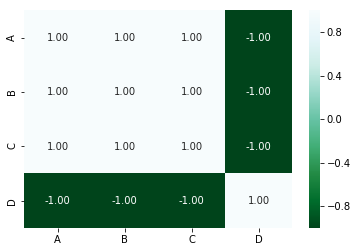

In [30]:
# 상관계수 시각화
import seaborn as sns

sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='BuGn_r')

### < 상관계수 활용 사례 >

- 데이터 파일 : ch3-1(유동인구수).csv
- 데이터 설명 : 2013년 전국 주요지점별 유동인구 수 현황의 일부
- 남자20대 vs. 여자20대, 남자10대 vs. 여자50대의 상관계수를 구하여 비교

In [37]:
# 데이터 적재
# encoding='utf-8' / 'cp949'
data = pd.read_csv('ch3-1(유동인구수).csv', encoding='cp949', engine='python')

In [38]:
# 데이터 확인
data.head()

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
0,2010-06-21,12시~13시까지,343099,417482,대전광역시 서구 월평동,2,24,68,50,31,4,37,64,44,26
1,2010-06-21,19시~20시까지,343099,417482,대전광역시 서구 월평동,19,44,28,33,21,14,56,49,43,18
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12
3,2010-06-20,19시~20시까지,343099,417482,대전광역시 서구 월평동,23,33,32,547,129,12,39,13,46,4
4,2010-06-21,12시~13시까지,343121,417343,대전광역시 서구 월평동,0,9,27,21,6,5,24,20,10,6


In [39]:
# 상관계수 분석 (남자20대 vs. 여자20대)
data[['남자20대', '여자20대']].corr()

,남자20대,여자20대
남자20대,1.00000,0.84728
여자20대,0.84728,1.00000


In [40]:
# 결과 해석
# 매우 높은 양의 선형 상관관계를 가진다고 볼 수 있다.
# 두 개의 컬럼은 중복 속성으로 고려할 수 있는 여지를 둘 수 있다.

In [41]:
# 상관계수 분석 (남자10대 vs. 여자50대)
data[['남자10대', '여자50대']].corr()

,남자10대,여자50대
남자10대,1.000000,0.263223
여자50대,0.263223,1.000000


In [ ]:
# 결과 해석
# 낮은 양의 선형 상관관계를 가진다고 볼 수 있다.
# 중복 속성으로 고려하기 어렵다.

Text(0.5, 1.0, 'male10 VS female50')

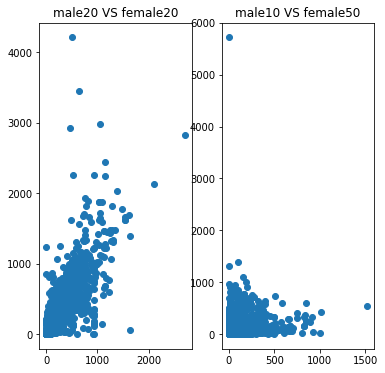

In [46]:
# 상관 관계를 시각화로 확인
# plt.subplot(1,2,1)
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.scatter(data['남자20대'], data['여자20대'])
plt.title('male20 VS female20')
plt.subplot(1,2,2)
plt.scatter(data['남자10대'], data['여자50대'])
plt.title('male10 VS female50')

### 상관계수가 1인 변수만 추출하기

In [47]:
# 다양한 경우의 수를 만들기 위한 새로운 데이터프레임 생성
data = [[1,2,3,4,5],
        [10,20,30,40,50],
        [1,3,5,7,9],
        [-1,-4,-6,-8,-10],
        [10,15,20,25,30],
        [-10,-11,-15,-17,-19]]

df = pd.DataFrame(data).T
df

,0,1,2,3,4,5
0,1,10,1,-1,10,-10
1,2,20,3,-4,15,-11
2,3,30,5,-6,20,-15
3,4,40,7,-8,25,-17
4,5,50,9,-10,30,-19


In [48]:
df.shape

(5, 6)

In [49]:
df.columns=list('abcdef')
df

,a,b,c,d,e,f
0,1,10,1,-1,10,-10
1,2,20,3,-4,15,-11
2,3,30,5,-6,20,-15
3,4,40,7,-8,25,-17
4,5,50,9,-10,30,-19


In [50]:
# 상관 계수 분석
df.corr()

,a,b,c,d,e,f
a,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
b,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
c,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
d,-0.995893,-0.995893,-0.995893,1.000000,-0.995893,0.974901
e,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
f,-0.986394,-0.986394,-0.986394,0.974901,-0.986394,1.000000


In [51]:
# 대칭형 데이터에서 한 쪽 값만 추출
# np.triu
# np.tril
np.triu(df.corr())

array([[ 1.        ,  1.        ,  1.        , -0.99589321,  1.        ,
        -0.98639392],
       [ 0.        ,  1.        ,  1.        , -0.99589321,  1.        ,
        -0.98639392],
       [ 0.        ,  0.        ,  1.        , -0.99589321,  1.        ,
        -0.98639392],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.99589321,
         0.97490102],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.98639392],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [52]:
# 데이터프레임으로 저장
single_tri = pd.DataFrame(np.triu(df.corr()), columns=df.columns)
single_tri

,a,b,c,d,e,f
0,1.0,1.0,1.0,-0.995893,1.000000,-0.986394
1,0.0,1.0,1.0,-0.995893,1.000000,-0.986394
2,0.0,0.0,1.0,-0.995893,1.000000,-0.986394
3,0.0,0.0,0.0,1.000000,-0.995893,0.974901
4,0.0,0.0,0.0,0.000000,1.000000,-0.986394
5,0.0,0.0,0.0,0.000000,0.000000,1.000000


In [53]:
single_tri.index = single_tri.columns

In [54]:
single_tri

,a,b,c,d,e,f
a,1.0,1.0,1.0,-0.995893,1.000000,-0.986394
b,0.0,1.0,1.0,-0.995893,1.000000,-0.986394
c,0.0,0.0,1.0,-0.995893,1.000000,-0.986394
d,0.0,0.0,0.0,1.000000,-0.995893,0.974901
e,0.0,0.0,0.0,0.000000,1.000000,-0.986394
f,0.0,0.0,0.0,0.000000,0.000000,1.000000


In [57]:
single_tri['a'][single_tri['a']==1]

a    1.0
Name: a, dtype: float64

In [58]:
single_tri['b'][single_tri['b']==1]

a    1.0
b    1.0
Name: b, dtype: float64

In [59]:
single_tri['c'][single_tri['c']==1]

a    1.0
b    1.0
c    1.0
Name: c, dtype: float64

In [60]:
single_tri['d'][single_tri['d']==1]

d    1.0
Name: d, dtype: float64

In [61]:
single_tri['e'][single_tri['e']==1]

a    1.0
b    1.0
c    1.0
e    1.0
Name: e, dtype: float64

In [ ]:
['a':['a'], 'b':['a','b'],'c':['a','b','c'],'d':['b','c']]

In [64]:
tmp = {}
for col in single_tri.columns:
    t = single_tri[col][single_tri[col]==1]
    t2 = []
    for i in t.index:
        if i != col:
            t2.append(i)
            tmp[col] = t2

{'b': ['a'], 'c': ['a', 'b'], 'e': ['a', 'b', 'c']}

In [80]:
final = {}
cnt = 0
for k in tmp.keys():
    for i in tmp.values():
        if k in i:
            cnt += 1
    final[k] = cnt

In [81]:
final

{'b': 2, 'c': 3, 'e': 3}

In [69]:
final

['b', 'c', 'c', 'e', 'e', 'e']

In [66]:
single_tri[tmp.keys()]

,b,c,e
a,1.0,1.0,1.000000
b,1.0,1.0,1.000000
c,0.0,1.0,1.000000
d,0.0,0.0,-0.995893
e,0.0,0.0,1.000000
f,0.0,0.0,0.000000


In [ ]:
# ★ 중복 조합이 여러 개가 있는 경우 하나만 남겨서 입력변수 선택
# 다음주(6/29)